<a href="https://colab.research.google.com/github/tazar09/h3_public_repo/blob/main/h3_hero-class_08-aug2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt # Added for plotting
import seaborn as sns         # Added for plotting

# Define primary skill progression probabilities for various hero classes.
# Probabilities are given as weights for Attack, Defense, Spell Power, and Knowledge respectively.
# The sum of weights for each level range should typically be 100 for easy percentage calculation.
#
# Added 'type' field to classify heroes as 'Might' or 'Magic' for specific simulation options.
HERO_CLASSES_DATA = {
    # Castle Town Heroes
    "Knight": {
        "type": "Might",
        "initial_skills": {"Attack": 2, "Defense": 2, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 35, "Defense": 45, "Spell Power": 10, "Knowledge": 10},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Cleric": {
        "type": "Magic",
        "initial_skills": {"Attack": 1, "Defense": 0, "Spell Power": 2, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 20, "Defense": 15, "Spell Power": 30, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Rampart Town Heroes
    "Ranger": {
        "type": "Might",
        "initial_skills": {"Attack": 1, "Defense": 3, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 35, "Defense": 45, "Spell Power": 10, "Knowledge": 10},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Druid": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 2, "Spell Power": 1, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 10, "Defense": 20, "Spell Power": 35, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Tower Town Heroes
    "Alchemist": {
        "type": "Magic", # Often considered Magic, though balanced
        "initial_skills": {"Attack": 1, "Defense": 1, "Spell Power": 2, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Wizard": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 0, "Spell Power": 2, "Knowledge": 3},
        "level_2_9_probs": {"Attack": 10, "Defense": 10, "Spell Power": 40, "Knowledge": 40},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Inferno Town Heroes
    "Demoniac": {
        "type": "Might",
        "initial_skills": {"Attack": 2, "Defense": 2, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 35, "Defense": 35, "Spell Power": 15, "Knowledge": 15},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Heretic": {
        "type": "Magic",
        "initial_skills": {"Attack": 1, "Defense": 1, "Spell Power": 2, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 15, "Defense": 15, "Spell Power": 35, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Necropolis Town Heroes
    "Death Knight": {
        "type": "Might",
        "initial_skills": {"Attack": 1, "Defense": 2, "Spell Power": 2, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 30, "Defense": 25, "Spell Power": 20, "Knowledge": 25},
        "level_10_plus_probs": {"Attack": 25, "Defense": 25, "Spell Power": 25, "Knowledge": 25},
    },
    "Necromancer": {
        "type": "Magic",
        "initial_skills": {"Attack": 1, "Defense": 0, "Spell Power": 2, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 15, "Defense": 15, "Spell Power": 35, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 25, "Defense": 25, "Spell Power": 25, "Knowledge": 25},
    },
    # Dungeon Town Heroes
    "Overlord": {
        "type": "Might",
        "initial_skills": {"Attack": 2, "Defense": 2, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 35, "Defense": 35, "Spell Power": 15, "Knowledge": 15},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Warlock": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 0, "Spell Power": 3, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 10, "Defense": 10, "Spell Power": 50, "Knowledge": 30},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Stronghold Town Heroes
    "Barbarian": {
        "type": "Might",
        "initial_skills": {"Attack": 4, "Defense": 0, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 55, "Defense": 35, "Spell Power": 5, "Knowledge": 5},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Battle Mage": {
        "type": "Magic", # Stronghold's magic hero
        "initial_skills": {"Attack": 2, "Defense": 1, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 30, "Defense": 20, "Spell Power": 25, "Knowledge": 25},
        "level_10_plus_probs": {"Attack": 25, "Defense": 25, "Spell Power": 25, "Knowledge": 25},
    },
    # Fortress Town Heroes
    "Beastmaster": {
        "type": "Might",
        "initial_skills": {"Attack": 0, "Defense": 4, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 30, "Defense": 50, "Spell Power": 10, "Knowledge": 10},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Witch": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 1, "Spell Power": 2, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 5, "Defense": 15, "Spell Power": 40, "Knowledge": 40},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
    # Conflux Town Heroes (from Armageddon's Blade expansion)
    "Planeswalker": {
        "type": "Might", # Conflux's Might hero
        "initial_skills": {"Attack": 3, "Defense": 1, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 45, "Defense": 25, "Spell Power": 15, "Knowledge": 15},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Elementalist": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 0, "Spell Power": 3, "Knowledge": 3},
        "level_2_9_probs": {"Attack": 15, "Defense": 15, "Spell Power": 35, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 25, "Defense": 25, "Spell Power": 25, "Knowledge": 25},
    },
    # Cove Town Heroes (from Horn of the Abyss expansion)
    "Captain": {
        "type": "Might",
        "initial_skills": {"Attack": 3, "Defense": 0, "Spell Power": 2, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 45, "Defense": 25, "Spell Power": 20, "Knowledge": 10},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Navigator": {
        "type": "Magic",
        "initial_skills": {"Attack": 2, "Defense": 0, "Spell Power": 1, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 15, "Defense": 10, "Spell Power": 40, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 30, "Defense": 20, "Spell Power": 20, "Knowledge": 30},
    },
    # Factory Town Heroes (from Horn of the Abyss expansion)
    "Mercenary": {
        "type": "Might",
        "initial_skills": {"Attack": 3, "Defense": 1, "Spell Power": 1, "Knowledge": 1},
        "level_2_9_probs": {"Attack": 35, "Defense": 35, "Spell Power": 15, "Knowledge": 15},
        "level_10_plus_probs": {"Attack": 30, "Defense": 30, "Spell Power": 20, "Knowledge": 20},
    },
    "Artificer": {
        "type": "Magic",
        "initial_skills": {"Attack": 0, "Defense": 1, "Spell Power": 2, "Knowledge": 2},
        "level_2_9_probs": {"Attack": 20, "Defense": 15, "Spell Power": 30, "Knowledge": 35},
        "level_10_plus_probs": {"Attack": 20, "Defense": 20, "Spell Power": 30, "Knowledge": 30},
    },
}

def _simulate_single_primary_skills(hero_class_name, target_level):
    """
    Simulates the primary skill progression for a single hero up to a target level.
    This is an internal helper function, modified to return only the final skills.

    Args:
        hero_class_name (str): The name of the hero class.
        target_level (int): The level to simulate up to.

    Returns:
        dict: A dictionary containing the final primary skill values.
              Returns None if the hero class is not found or target_level is invalid.
    """
    if hero_class_name not in HERO_CLASSES_DATA:
        return None
    if target_level < 1:
        return None

    class_data = HERO_CLASSES_DATA[hero_class_name]
    current_skills = class_data["initial_skills"].copy()

    for level_gained in range(1, target_level):
        if (level_gained + 1) < 10:
            probs = class_data["level_2_9_probs"]
        else:
            probs = class_data["level_10_plus_probs"]

        skill_choices = list(probs.keys())
        skill_weights = list(probs.values())

        skill_to_increase = random.choices(skill_choices, weights=skill_weights, k=1)[0]
        current_skills[skill_to_increase] += 1

    return current_skills

def _calculate_average_primary_skills(hero_class_name, target_level, num_simulations):
    """
    Performs multiple simulations of primary skill progression and calculates the average.
    This is an internal helper function, returning only the average dictionary.

    Args:
        hero_class_name (str): The name of the hero class.
        target_level (int): The level to simulate up to.
        num_simulations (int): The number of random simulations to perform.

    Returns:
        dict: A dictionary containing the average primary skill values.
              Returns None if input is invalid or simulation fails.
    """
    if hero_class_name not in HERO_CLASSES_DATA or target_level < 1 or num_simulations < 1:
        return None

    sum_skills = {"Attack": 0, "Defense": 0, "Spell Power": 0, "Knowledge": 0}

    for i in range(num_simulations):
        simulated_skills = _simulate_single_primary_skills(hero_class_name, target_level)

        if simulated_skills is None:
            return None

        for skill, value in simulated_skills.items():
            sum_skills[skill] += value

    average_skills = {skill: round(total / num_simulations, 2) for skill, total in sum_skills.items()}
    return average_skills

def _plot_primary_skills(df, x_skill, y_skill, title, hero_type_coloring=False):
    """
    Generates and displays a scatter plot with a regression line for primary skills.

    Args:
        df (pd.DataFrame): DataFrame containing the primary skill data.
        x_skill (str): Name of the skill for the X-axis.
        y_skill (str): Name of the skill for the Y-axis.
        title (str): Title of the plot.
        hero_type_coloring (bool): If True, colors points based on 'Type' column in df.
    """
    if df is None or df.empty:
        print("No data to plot.")
        return

    # Create the scatter plot
    fig, ax = plt.subplots(figsize=(10, 7))

    if hero_type_coloring and 'Type' in df.columns:
        # Use seaborn's scatterplot with hue for coloring by hero type
        sns.scatterplot(x=x_skill, y=y_skill, data=df, hue='Type', s=100, alpha=0.8, ax=ax, edgecolor='w', linewidth=0.5)
        # Place legend outside to avoid obscuring plot
        ax.legend(title='Hero Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        # Default scatter plot if no type coloring or 'Type' column not present
        ax.scatter(df[x_skill], df[y_skill], s=60, alpha=0.8, edgecolors='w', linewidth=0.5)

    ax.spines[['top', 'right']].set_visible(False)

    for i, txt in enumerate(df.index):
        ax.annotate(txt, (df[x_skill].iloc[i], df[y_skill].iloc[i]),
                    textcoords="offset points", xytext=(0, 8), ha='center', fontsize=9)

    sns.regplot(x=x_skill, y=y_skill, data=df, ax=ax, scatter=False, color='red', line_kws={'lw': 2, 'alpha': 0.7})

    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel(x_skill, fontsize=12)
    ax.set_ylabel(y_skill, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


def simulate_heroes_primary_skills(option, hero_class=None, level_reached=None, num_simulations=None):
    """
    Simulates primary skill progression for Heroes of Might and Magic III based on chosen options.

    Args:
        option (int):
            1: Simulate a single hero class. Returns DataFrame. Requires `hero_class`, `level_reached`, `num_simulations`.
            2: Simulate all Might heroes. Returns DataFrame. Requires `level_reached`, `num_simulations`.
            3: Simulate all Magic heroes. Returns DataFrame. Requires `level_reached`, `num_simulations`.
            4: Simulate all hero classes. Returns DataFrame. Requires `level_reached`, `num_simulations`.
            5: Simulate Might heroes and plot Attack vs Defense. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            6: Simulate Magic heroes and plot Attack vs Defense. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            7: Simulate Might heroes and plot Spell Power vs Knowledge. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            8: Simulate Magic heroes and plot Spell Power vs Knowledge. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            9: Simulate ALL heroes and plot Spell Power vs Knowledge, colored by hero type. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            10: Simulate ALL heroes and plot Defense vs Attack, colored by hero type. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
            11: Simulate ALL heroes and plot (Spell Power + Knowledge) vs (Attack + Defense), colored by hero type. Returns DataFrame and plot. Requires `level_reached`, `num_simulations`.
        hero_class (str, optional): The specific hero class name for option 1.
        level_reached (int, optional): The target level for the simulation(s).
        num_simulations (int, optional): The number of random simulations for each hero.

    Returns:
        pandas.DataFrame: A DataFrame with the average primary skill results.
                          Returns None if input is invalid or simulation fails.
    """
    results_list = []

    # Validate essential parameters that apply to all options
    if level_reached is None or num_simulations is None or level_reached < 1 or num_simulations < 1:
        print("Error: 'level_reached' and 'num_simulations' must be provided and be positive integers.")
        return None

    # Determine which heroes to simulate based on the option
    heroes_to_simulate = []
    plot_x_skill = None
    plot_y_skill = None
    plot_title_suffix = ""
    plot_hero_type_coloring = False

    if option == 1:
        if hero_class is None or hero_class not in HERO_CLASSES_DATA:
            print(f"Error: Hero class '{hero_class}' not found or not provided for Option 1.")
            print(f"Available classes are: {', '.join(HERO_CLASSES_DATA.keys())}")
            return None
        heroes_to_simulate = [hero_class]
        print(f"--- Simulating {hero_class} to Level {level_reached} with {num_simulations} simulations ---")

    elif option == 2: # Might Heroes (DataFrame only)
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Might"]
        print(f"--- Simulating ALL Might Heroes to Level {level_reached} with {num_simulations} simulations (DataFrame Only) ---")
    elif option == 3: # Magic Heroes (DataFrame only)
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Magic"]
        print(f"--- Simulating ALL Magic Heroes to Level {level_reached} with {num_simulations} simulations (DataFrame Only) ---")
    elif option == 4: # All Heroes (DataFrame only)
        heroes_to_simulate = list(HERO_CLASSES_DATA.keys())
        print(f"--- Simulating ALL Heroes to Level {level_reached} with {num_simulations} simulations (DataFrame Only) ---")

    elif option == 5: # Might Heroes, Plot Attack vs Defense
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Might"]
        plot_x_skill = 'Attack'
        plot_y_skill = 'Defense'
        plot_title_suffix = " (Might Heroes: Attack vs Defense)"
        print(f"--- Simulating ALL Might Heroes for Plotting (Attack vs Defense) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 6: # Magic Heroes, Plot Attack vs Defense
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Magic"]
        plot_x_skill = 'Attack'
        plot_y_skill = 'Defense'
        plot_title_suffix = " (Magic Heroes: Attack vs Defense)"
        print(f"--- Simulating ALL Magic Heroes for Plotting (Attack vs Defense) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 7: # Might Heroes, Plot Spell Power vs Knowledge
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Might"]
        plot_x_skill = 'Spell Power'
        plot_y_skill = 'Knowledge'
        plot_title_suffix = " (Might Heroes: Spell Power vs Knowledge)"
        print(f"--- Simulating ALL Might Heroes for Plotting (Spell Power vs Knowledge) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 8: # Magic Heroes, Plot Spell Power vs Knowledge
        heroes_to_simulate = [name for name, data in HERO_CLASSES_DATA.items() if data["type"] == "Magic"]
        plot_x_skill = 'Spell Power'
        plot_y_skill = 'Knowledge'
        plot_title_suffix = " (Magic Heroes: Spell Power vs Knowledge)"
        print(f"--- Simulating ALL Magic Heroes for Plotting (Spell Power vs Knowledge) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 9: # ALL Heroes, Plot Spell Power vs Knowledge, colored by type
        heroes_to_simulate = list(HERO_CLASSES_DATA.keys())
        plot_x_skill = 'Spell Power'
        plot_y_skill = 'Knowledge'
        plot_title_suffix = " (All Heroes: Spell Power vs Knowledge, by Type)"
        plot_hero_type_coloring = True
        print(f"--- Simulating ALL Heroes for Plotting (Spell Power vs Knowledge, by Type) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 10: # ALL Heroes, Plot Defense vs Attack, colored by type
        heroes_to_simulate = list(HERO_CLASSES_DATA.keys())
        plot_x_skill = 'Attack'
        plot_y_skill = 'Defense'
        plot_title_suffix = " (All Heroes: Defense vs Attack, by Type)"
        plot_hero_type_coloring = True
        print(f"--- Simulating ALL Heroes for Plotting (Defense vs Attack, by Type) to Level {level_reached} with {num_simulations} simulations ---")
    elif option == 11: # ALL Heroes, Plot (Spell Power + Knowledge) vs (Attack + Defense), colored by type
        heroes_to_simulate = list(HERO_CLASSES_DATA.keys())
        plot_x_skill = 'Magic Power Sum' # New calculated column
        plot_y_skill = 'Combat Power Sum' # New calculated column
        plot_title_suffix = " (All Heroes: Magic vs Combat Power, by Type)"
        plot_hero_type_coloring = True
        print(f"--- Simulating ALL Heroes for Plotting (Magic vs Combat Power, by Type) to Level {level_reached} with {num_simulations} simulations ---")
    else:
        print("Error: Invalid option. Please choose 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, or 11.")
        return None

    # Perform simulations for the selected heroes
    for hero_name in heroes_to_simulate:
        print(f"Processing {hero_name}...")
        avg_skills = _calculate_average_primary_skills(hero_name, level_reached, num_simulations)
        if avg_skills:
            row = {"Hero Class": hero_name}
            row.update(avg_skills)
            results_list.append(row)
        else:
            print(f"Simulation failed for {hero_name}.")

    if not results_list:
        print("No simulation results to display.")
        return None

    df = pd.DataFrame(results_list)
    df = df.set_index("Hero Class")

    # Add 'Type' column to the DataFrame if needed for plotting
    df['Type'] = df.index.map(lambda x: HERO_CLASSES_DATA[x]['type'])

    # Calculate new sum columns for option 11 if needed
    if option == 11:
        df['Magic Power Sum'] = df['Spell Power'] + df['Knowledge']
        df['Combat Power Sum'] = df['Attack'] + df['Defense']

    print("\n--- Simulation Complete ---")
    print(df)
    print("--------------------------")

    # Generate plot if a plotting option was selected
    if option in [5, 6, 7, 8, 9, 10, 11]:
        _plot_primary_skills(df, plot_x_skill, plot_y_skill,
                             f'Average Primary Skills (Level {level_reached}, {num_simulations} Sims){plot_title_suffix}',
                             hero_type_coloring=plot_hero_type_coloring)
        print("\n--- Plot Generated ---")

    return df

--- Simulating ALL Heroes for Plotting (Magic vs Combat Power, by Type) to Level 25 with 100 simulations ---
Processing Knight...
Processing Cleric...
Processing Ranger...
Processing Druid...
Processing Alchemist...
Processing Wizard...
Processing Demoniac...
Processing Heretic...
Processing Death Knight...
Processing Necromancer...
Processing Overlord...
Processing Warlock...
Processing Barbarian...
Processing Battle Mage...
Processing Beastmaster...
Processing Witch...
Processing Planeswalker...
Processing Elementalist...
Processing Captain...
Processing Navigator...
Processing Mercenary...
Processing Artificer...

--- Simulation Complete ---
              Attack  Defense  Spell Power  Knowledge   Type  Magic Power Sum  \
Hero Class                                                                      
Knight          9.60    10.49         4.92       4.99  Might             9.91   
Cleric          5.63     4.00         9.28      10.09  Magic            19.37   
Ranger          8.92   

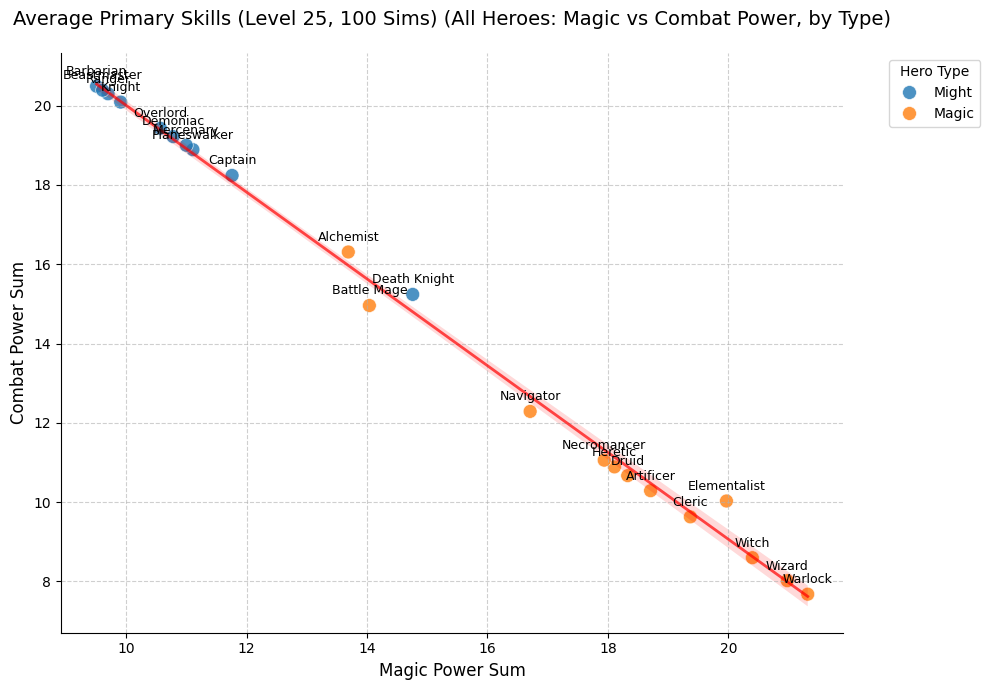


--- Plot Generated ---


,Attack,Defense,Spell Power,Knowledge,Type,Magic Power Sum,Combat Power Sum
Hero Class,,,,,,,
Knight,9.60,10.49,4.92,4.99,Might,9.91,20.09
Cleric,5.63,4.00,9.28,10.09,Magic,19.37,9.63
Ranger,8.92,11.38,4.80,4.90,Might,9.70,20.30
Druid,4.09,6.58,8.39,9.94,Magic,18.33,10.67
Alchemist,8.10,8.21,6.76,6.93,Magic,13.69,16.31
Wizard,4.19,3.83,9.75,11.23,Magic,20.98,8.02
Demoniac,9.81,9.41,5.39,5.39,Might,10.78,19.22
Heretic,5.66,5.23,9.43,8.68,Magic,18.11,10.89
Death Knight,7.13,8.11,7.83,6.93,Might,14.76,15.24


In [ ]:
simulate_heroes_primary_skills(option=11, level_reached=25, num_simulations=100)